<a href="https://colab.research.google.com/github/Deepakchakra/Mini-project-audio-signal-classification-/blob/main/AUDIO_1DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/audio_data/dataset/Music Info.csv')
print(df.dtypes)
df.head(7)

track_id                object
name                    object
artist                  object
spotify_preview_url     object
spotify_id              object
tags                    object
genre                   object
year                     int64
duration_ms              int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
dtype: object


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4
5,TRUMISQ128F9340BEE,Somebody Told Me,The Killers,https://p.scdn.co/mp3-preview/0d07673cfb46218a...,0FNmIQ7u45Lhdn6RHhSLix,"rock, alternative, indie, pop, alternative_roc...",NaN,2005,198480,0.508,...,10,-4.289,0,0.0847,0.000087,0.000643,0.0641,0.704,138.030,4
6,TRVCCWR128F9304A30,Viva la Vida,Coldplay,https://p.scdn.co/mp3-preview/ab747fed1bfab2ac...,08A1lZeyLMWH58DT6aYjnC,"rock, alternative, indie, pop, alternative_roc...",NaN,2013,235384,0.588,...,8,-7.903,1,0.1050,0.153000,0.000000,0.0634,0.520,137.973,4


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [5]:
# Convert all object (categorical) columns to numeric codes
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes


In [6]:
print(df.dtypes)

track_id                 int32
name                     int32
artist                   int16
spotify_preview_url      int32
spotify_id               int32
tags                     int16
genre                     int8
year                     int64
duration_ms              int64
danceability           float64
energy                 float64
key                      int64
loudness               float64
mode                     int64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
time_signature           int64
dtype: object


In [7]:
# Selecting the Feature, by remove the unused feature
feature = ['time_signature']
x = df.drop(feature, axis=1)
# Set The Target
y= df["time_signature"]

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle = False, test_size=0.25, random_state=42)



In [26]:
print(X_train.shape)
print(y_train.shape)

(38012, 20)
(38012,)


In [27]:
import numpy as np

X_train = np.expand_dims(X_train, axis=2)
X_test  = np.expand_dims(X_test, axis=2)

print(X_train.shape)

(38012, 20, 1)


In [28]:
print(X_train.shape)
print(y_train.shape)

(38012, 20, 1)
(38012,)


In [30]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(20,1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')  # Multipal classification, so use softmax activation
])

In [31]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 19, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 8, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 3, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,919 (390.31 KB)

 Trainable params: 99,919 (390.31 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print(X_train.dtype)  # should be float32
print(y_train.dtype)  # should be int32 or float32

float64
int64


In [39]:
model.fit(X_train, y_train, epochs=20, batch_size=40, validation_split=0.2)

Epoch 1/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8906 - loss: 0.4016 - val_accuracy: 0.9087 - val_loss: 0.3483
Epoch 2/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8878 - loss: 0.4063 - val_accuracy: 0.9087 - val_loss: 0.3455
Epoch 3/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8896 - loss: 0.4050 - val_accuracy: 0.9089 - val_loss: 0.3472
Epoch 4/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8884 - loss: 0.4701 - val_accuracy: 0.9087 - val_loss: 0.3494
Epoch 5/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8866 - loss: 0.4827 - val_accuracy: 0.9087 - val_loss: 0.3455
Epoch 6/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8905 - loss: 0.4736 - val_accuracy: 0.9087 - val_loss: 0.3455
Epoch 7/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8896 - loss: 0.4021 - val_accuracy: 0.9089 - val_loss: 0.3456
Epoch 8/20
761/761 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8929 - loss: 0.3976 - val_accuracy

In [40]:

# Generate some test data

# Predict on test data
predictions = model.predict(X_test)

# Print predictions
print("Predictions:")
print(predictions)

# Evaluate the model on test data (if you have labels)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predictions:
[[1.6573658e-04 1.0877380e-02 8.5979869e-11 ... 3.2367675e-10
  1.5719158e-09 1.3341968e-10]
 [1.6988801e-05 5.0127893e-03 1.4315717e-13 ... 2.8617545e-12
  4.5426227e-10 2.7490584e-12]
 [1.4312385e-05 4.5797778e-03 7.6521905e-14 ... 1.9218470e-12
  6.1188760e-10 2.1144351e-12]
 ...
 [1.4686729e-05 4.7714561e-03 8.7398533e-14 ... 2.1504651e-12
  5.9195499e-10 2.4462077e-12]
 [1.2348142e-05 4.3530716e-03 5.0694546e-14 ... 1.3358636e-12
  4.4785681e-10 1.5145433e-12]
 [1.2510278e-05 4.4546062e-03 5.5660473e-14 ... 1.4027789e-12
  3.9497436e-10 1.5608648e-12]]
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.5028
Test loss: 0.4738, Test accuracy: 0.8678


In [41]:

pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[    0     0     0     3     0]
 [    0     0     0   153     0]
 [    0     0     0  1257     0]
 [    0     0     0 10996     0]
 [    0     0     0   262     0]]


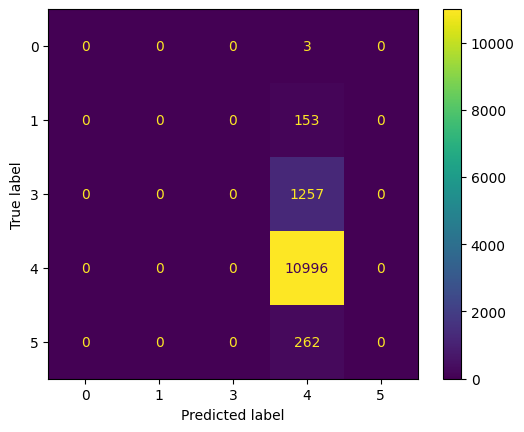

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_y)
#disp.plot()

In [44]:
from sklearn import metrics
# Show the Accuracy, Precision, Recall, F1, etc.
acc = metrics.accuracy_score(y_test, pred_y)
prec= metrics.precision_score(y_test, pred_y, average='weighted')
rec = metrics.recall_score(y_test, pred_y, average='weighted')
f1 = metrics.f1_score(y_test, pred_y, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.8678083813432247
Precision: 0.7530913867295477
Recall: 0.8678083813432247
F1 Score: 0.8063904137617863


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
